## Test des différentes distances sur des jeux de données basés sur des modèles de ressort

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import time
import pandas as pd
from tqdm import tqdm

from descriptor import compute_descriptor
from wasserstein_distance import compute_wasserstein_distance
from kolmogorov_distance import compute_kolmogorov_dist
from data_functions import load_data, plot_data

## Simulation d'un ressort perturbé
(Force qui change de sens selon la vitesse du ressort)

In [20]:
def compute_ressort(T, dt, V_0, V_1, F, k, Vmin, Vmax, noise=False, sigma=0):
    """ Modele de ressort
     - T: nombre de points
     - dt: pas de temps entre deux points
     - V_0, V_1: 2 premieres vitesses ??
     - F: force appliquée au ressort
     - Vmin, Vmax: si la vitesse devient trop faible ou trop importante on applique
       la force dans le sens inverse pour exciter ou ralentir le ressort"""
    V = np.zeros((T, ))
    V[0] = V_0
    V[1] = V_1
    for t in range(2, T):
        V[t] = -dt**2*(k*V[t-1]) + 2*V[t-1] - V[t-2] - dt*F*(V[t-1] - V[t-2])
        if noise:
            V[t] += np.random.normal(0, sigma)
        if abs(V[t]) < Vmin:
            F = - F
        elif abs(V[t]) > Vmax:
            F= - F

    return V

### Test

In [41]:
T = 300
dt = 1

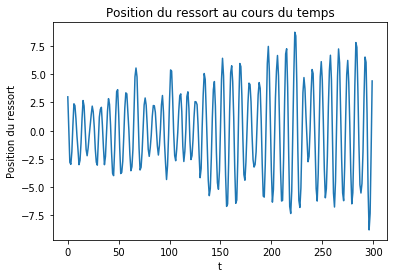

In [45]:
V = compute_ressort(T, dt, V_0=3, V_1=0, F=.05, k=0.5, Vmin=0.1, Vmax=4, noise=True, sigma=0.5)
plt.plot(V)
plt.ylabel("Position du ressort")
plt.xlabel("t")
plt.title("Position du ressort au cours du temps")
plt.show()

### Simuler plein de ressorts ayant le même jeu de paamètres avec des conditions initiales et un bruit différent

In [56]:
def simu_ressort(N, F, k, Vmin, Vmax, sigma=1):

    # On tire N simulations aléatoires selon un jeu de paramètre fixé. 
    # Seuls varient le bruit et les vitesses intiales

    simus = []

    for i in range(N):
        V_0 = np.random.random()*10 - 5
        V_1 = np.random.random()*10 - 5  

        V = compute_ressort(T, dt, V_0, V_1, F, k, Vmin, Vmax,
                            noise=True, sigma=sigma)
        simus.append(V)
        
    return simus

**Test:**

In [57]:
N = 5
F = 0.5
k = 0.5
Vmin = 0.1
Vmax = 4

simus = simu_ressort(N, F, k, Vmin, Vmax)

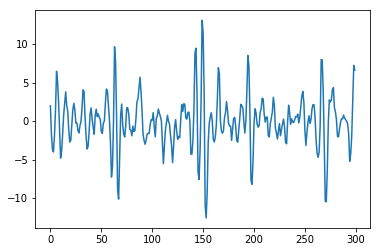

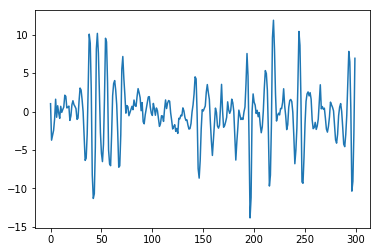

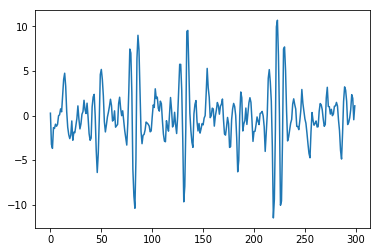

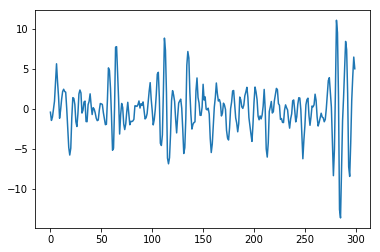

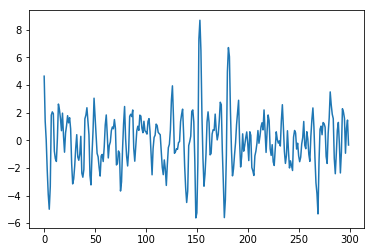

In [58]:
for V in simus:
    plt.plot(V)
    plt.show()